In [1]:
'''This program attempts to optimize a users portfolio using the Efficient Frontier'''

'This program attempts to optimize a users portfolio using the Efficient Frontier'

In [11]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
#Get the stock tickers in the portfolio
assets = ['AMD','NFLX','AAPL','GOOG']

In [4]:
#Assign weights to the stocks.
weights = np.array([0.25,0.25,0.25,0.25])

In [5]:
# Get the stock/ portfolio starting date
stockStartDate = '2015-01-01'

In [6]:
# Get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-02-12'

In [12]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
yf.pdr_override()

# Store the adjusted close price of the sock into the df
for stock in assets:
  df[stock] = web.get_data_yahoo(stock,start=stockStartDate,end=today)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
# show df
df

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,2.670000,49.848572,24.435270,26.168653
2015-01-05,2.660000,47.311428,23.746889,25.623152
2015-01-06,2.630000,46.501431,23.749121,25.029282
2015-01-07,2.580000,46.742859,24.082140,24.986401
2015-01-08,2.610000,47.779999,25.007433,25.065184
...,...,...,...,...
2024-02-05,174.229996,562.059998,187.440811,144.929993
2024-02-06,167.880005,555.880005,189.058762,145.410004
2024-02-07,170.940002,559.299988,189.168625,146.679993


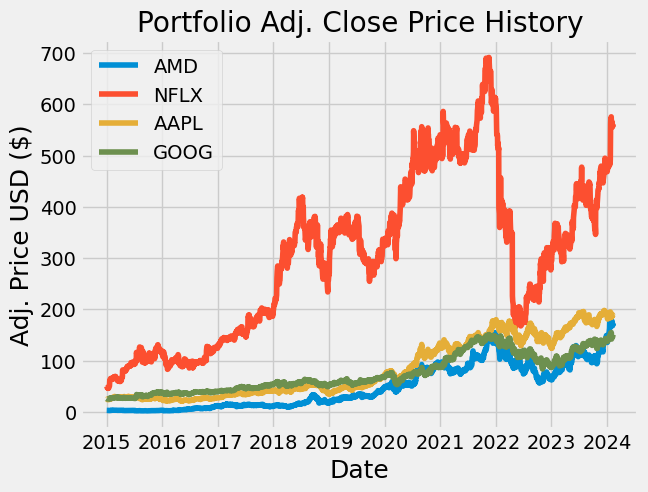

In [14]:
# Visually show the stock/ portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [15]:
# show the daily simple return
returns = df.pct_change()
returns

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.003745,-0.050897,-0.028172,-0.020846
2015-01-06,-0.011278,-0.017121,0.000094,-0.023177
2015-01-07,-0.019011,0.005192,0.014022,-0.001713
2015-01-08,0.011628,0.022188,0.038422,0.003153
...,...,...,...,...
2024-02-05,-0.019307,-0.004569,0.009847,0.009684
2024-02-06,-0.036446,-0.010995,0.008632,0.003312
2024-02-07,0.018227,0.006152,0.000581,0.008734


In [16]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AMD,NFLX,AAPL,GOOG
AMD,0.355690,0.089741,0.073764,0.066233
NFLX,0.089741,0.201138,0.055174,0.059551
AAPL,0.073764,0.055174,0.083862,0.051458
GOOG,0.066233,0.059551,0.051458,0.081720


In [17]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.09464086101813611

In [18]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.30763754812788396

In [19]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.3752090391180538

In [20]:
# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 38.0%
Annual volatility/ risk: 31.0%
Annual variance: 9.0%


In [21]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


In [22]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [29]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.36019), ('NFLX', 0.15016), ('AAPL', 0.40641), ('GOOG', 0.08324)])
Expected annual return: 37.5%
Annual volatility: 33.5%
Sharpe Ratio: 1.06


(0.3754916917897414, 0.3347812843300769, 1.0618625007700402)

In [28]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AMD': 104, 'NFLX': 13, 'AAPL': 108, 'GOOG': 28}
Funds remaining: $162.96


OrderedDict([('AMD', 1.00002), ('NFLX', 0.99769), ('AAPL', 0.0023), ('GOOG', -1.0)])
Expected annual return: 67.5%
Annual volatility: 75.2%
Sharpe Ratio: 0.87


(0.6747875707375154, 0.7521710172543944, 0.870530179596188)

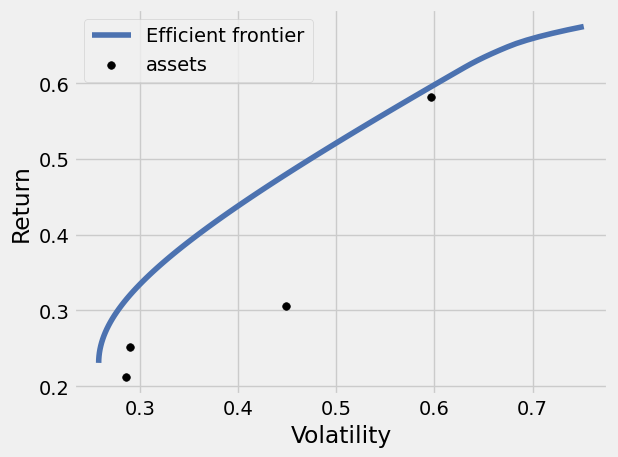

In [30]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)




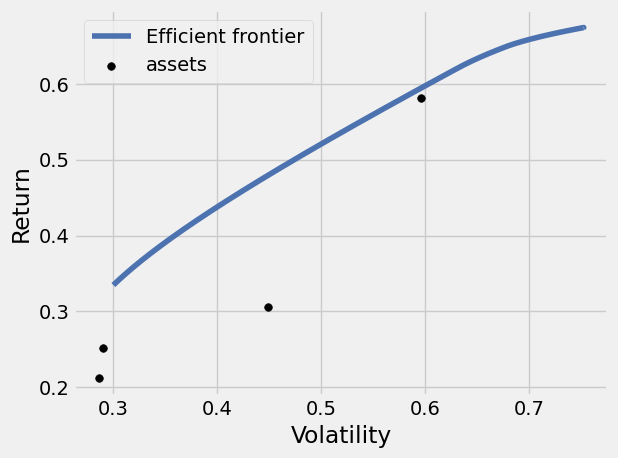

OrderedDict([('AMD', 1.0), ('NFLX', 1.0), ('AAPL', 0.0), ('GOOG', -1.0)])
Expected annual return: 67.5%
Annual volatility: 75.3%
Sharpe Ratio: 0.87


(0.6749044979242728, 0.7526363254836757, 0.8701473417502187)

In [31]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
# 100 portfolios with risks between 0.10 and 0.30
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,show_assets=True, showfig=True)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


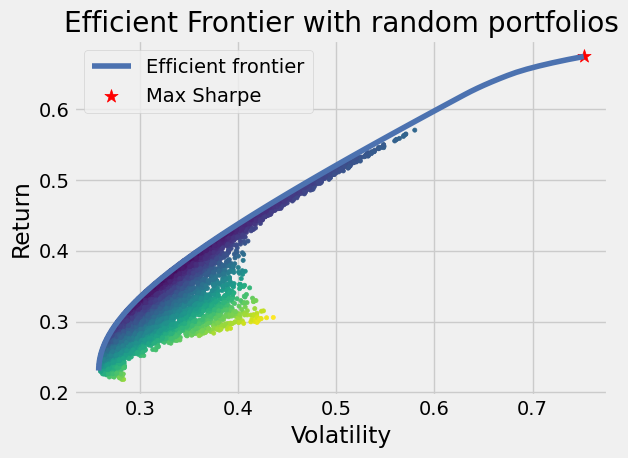

In [33]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
#ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()